<a href="https://colab.research.google.com/github/jrchac/ML-Recruitment-Project/blob/main/Model_2_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model 2 - Random Forest

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
# import csv
data = pd.read_csv('recruitmentdataset-2022-1.3.csv')
data = data[data['company']=='C']
labels = data['decision']
data = data.drop(columns = ['decision', 'Id', 'company'])

In [50]:
# normalize grades to between 0-1
grades = data['ind-university_grade']
data['ind-university_grade']= (grades-grades.min())/(grades.max()-grades.min())
data['ind-university_grade']

2000    0.344828
2001    0.448276
2002    0.448276
2003    0.275862
2004    0.827586
          ...   
2995    0.965517
2996    0.586207
2997    0.379310
2998    0.758621
2999    0.034483
Name: ind-university_grade, Length: 1000, dtype: float64

In [51]:
# function to one-hot encode categorical data that are currently strings
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [52]:
# perform one-hot encoding for these columns
features_to_encode = ['ind-degree', 'gender', 'sport', 'nationality']
for feature in features_to_encode:
    data = encode_and_bind(data, feature)

In [53]:
# column names of expanded dataframe
data.columns

Index(['age', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',
       'ind-international_exp', 'ind-entrepeneur_exp', 'ind-languages',
       'ind-exact_study', 'ind-degree_bachelor', 'ind-degree_master',
       'ind-degree_phd', 'gender_female', 'gender_male', 'gender_other',
       'sport_Chess', 'sport_Cricket', 'sport_Football', 'sport_Golf',
       'sport_Rugby', 'sport_Running', 'sport_Swimming', 'sport_Tennis',
       'nationality_Belgian', 'nationality_Dutch', 'nationality_German'],
      dtype='object')

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib.ticker import FormatStrFormatter

In [55]:
# M2 models

y = labels
## Dropping the variable 'label' from X variable

# use most important from rf ranking
x_7_1 = data[['ind-university_grade', 'age', 'ind-languages', 'ind-international_exp', 'ind-degree_bachelor','ind-degree_master','ind-exact_study']]
x_6_1 = data[['ind-university_grade', 'age', 'ind-languages', 'ind-international_exp', 'ind-degree_bachelor','ind-degree_master']]
x_5_1 = data[['ind-university_grade', 'age', 'ind-languages', 'ind-international_exp', 'ind-degree_bachelor']]
x_4_1 = data[['ind-university_grade', 'age', 'ind-languages', 'ind-international_exp']]


# use most important from logistic ranking
x_7_2 = data[['ind-international_exp', 'ind-languages', 'ind-degree_bachelor','ind-degree_phd', 'ind-exact_study','ind-entrepeneur_exp', 'ind-university_grade']]
x_6_2 = data[['ind-international_exp', 'ind-languages', 'ind-degree_bachelor','ind-degree_phd', 'ind-exact_study','ind-entrepeneur_exp']]
x_5_2 = data[['ind-international_exp', 'ind-languages', 'ind-degree_bachelor','ind-degree_phd', 'ind-exact_study']]
x_4_2 = data[['ind-international_exp', 'ind-languages', 'ind-degree_bachelor','ind-degree_phd']]


In [56]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)

In [57]:
x_train_71, x_test_71, y_train_71, y_test_71 = train_test_split(x_7_1, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)
x_train_61, x_test_61, y_train_61, y_test_61 = train_test_split(x_6_1, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)
x_train_51, x_test_51, y_train_51, y_test_51 = train_test_split(x_5_1, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)
x_train_41, x_test_41, y_train_41, y_test_41 = train_test_split(x_4_1, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)


x_train_72, x_test_72, y_train_72, y_test_72 = train_test_split(x_7_2, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)
x_train_62, x_test_62, y_train_62, y_test_62 = train_test_split(x_6_2, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)
x_train_52, x_test_52, y_train_52, y_test_52 = train_test_split(x_5_2, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)
x_train_42, x_test_42, y_train_42, y_test_42 = train_test_split(x_4_2, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)

In [58]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'n_estimators':[100,200,300],
                     'max_depth': [1,3,5,7,11]}]

# specify model
model = RandomForestClassifier(random_state=0)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring= ['accuracy', 'precision','recall','f1'],
                        cv = folds,
                        refit = 'f1',
                        verbose = 0,
                        return_train_score=True)

# Model 7-1

In [59]:
m_71 = model_cv.fit(x_train_71, y_train_71)
print(m_71.best_params_)

{'max_depth': 7, 'n_estimators': 300}


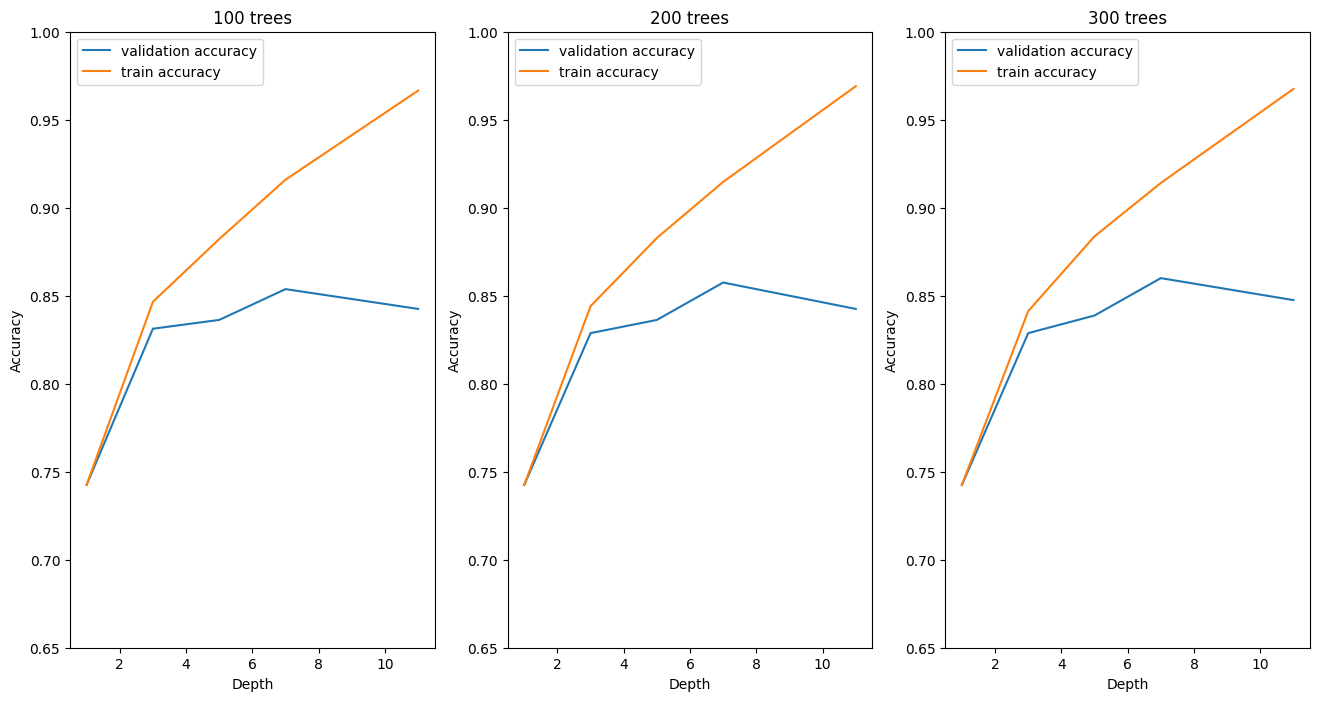

In [60]:
cvresults_71 = pd.DataFrame(m_71.cv_results_)
# cvresults_71.to_excel("output71.xlsx")

## plot training vs validation accuracy scores
plt.figure(figsize=(16,8))
# subplot 1/3
plt.subplot(131)
trees_100 = cvresults_71[cvresults_71['param_n_estimators']==100]
trees_100

plt.plot(trees_100["param_max_depth"], trees_100["mean_test_accuracy"])
plt.plot(trees_100["param_max_depth"], trees_100["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("100 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')

# subplot 2/3
plt.subplot(132)
trees_200 = cvresults_71[cvresults_71['param_n_estimators']==200]

plt.plot(trees_200["param_max_depth"], trees_200["mean_test_accuracy"])
plt.plot(trees_200["param_max_depth"], trees_200["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("200 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')


# subplot 3/3
plt.subplot(133)
trees_300 = cvresults_71[cvresults_71['param_n_estimators']==300]

plt.plot(trees_300["param_max_depth"], trees_300["mean_test_accuracy"])
plt.plot(trees_300["param_max_depth"], trees_300["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("300 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')


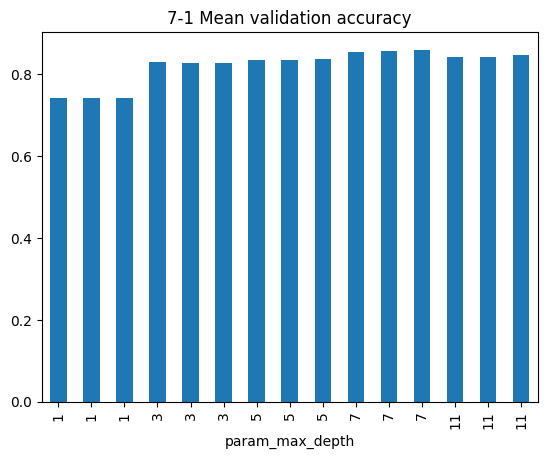

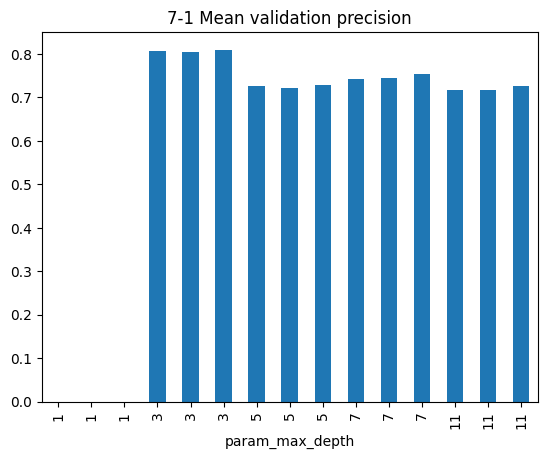

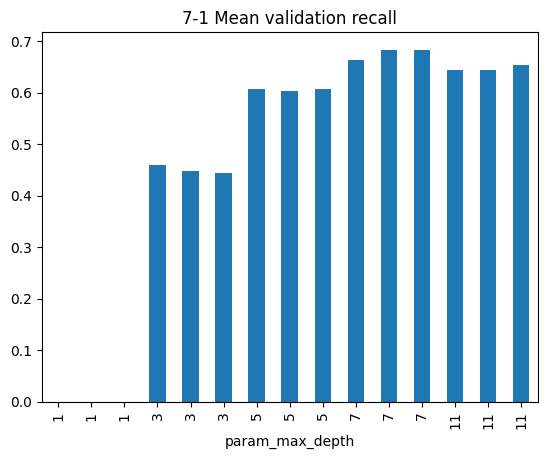

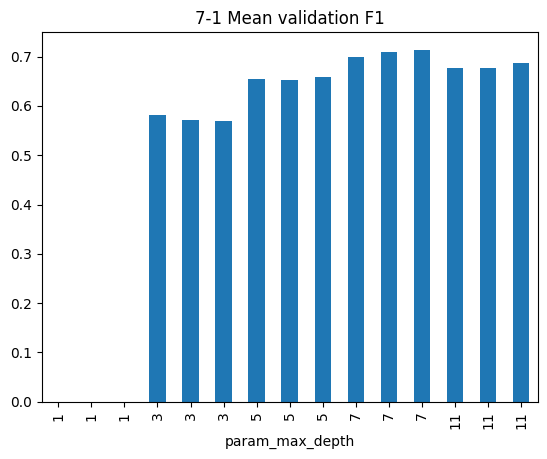

In [61]:
# show barcharts for all performance measures based on max tree depth

cvresults_71.plot(x = 'param_max_depth', y = 'mean_test_accuracy', kind = 'bar', legend = 0, title = '7-1 Mean validation accuracy')
cvresults_71.plot(x = 'param_max_depth', y = 'mean_test_precision', kind = 'bar', legend = 0, title = '7-1 Mean validation precision')
cvresults_71.plot(x = 'param_max_depth', y = 'mean_test_recall', kind = 'bar', legend = 0, title = '7-1 Mean validation recall')
cvresults_71.plot(x = 'param_max_depth', y = 'mean_test_f1', kind = 'bar', legend = 0, title = '7-1 Mean validation F1')
plt.show()

In [62]:
# show all performance measures and confusion matrix for best model version

m_71 = m_71.best_estimator_
pre_71 = m_71.predict(x_test_71)
t_ac_71 = metrics.accuracy_score(y_test_71, pre_71)
t_prec_71 = metrics.precision_score(y_test_71, pre_71)
t_recal_71 = metrics.recall_score(y_test_71, pre_71)
t_f1_71 = metrics.f1_score(y_test_71, pre_71)
print(t_ac_71)
print(t_prec_71)
print(t_recal_71)
print(t_f1_71)
print(metrics.confusion_matrix(y_test_71, pre_71))

0.865
0.7551020408163265
0.7115384615384616
0.7326732673267328
[[136  12]
 [ 15  37]]


# Model 6-1

In [63]:
m_61 = model_cv.fit(x_train_61, y_train_61)
print(m_61.best_params_)

{'max_depth': 7, 'n_estimators': 200}


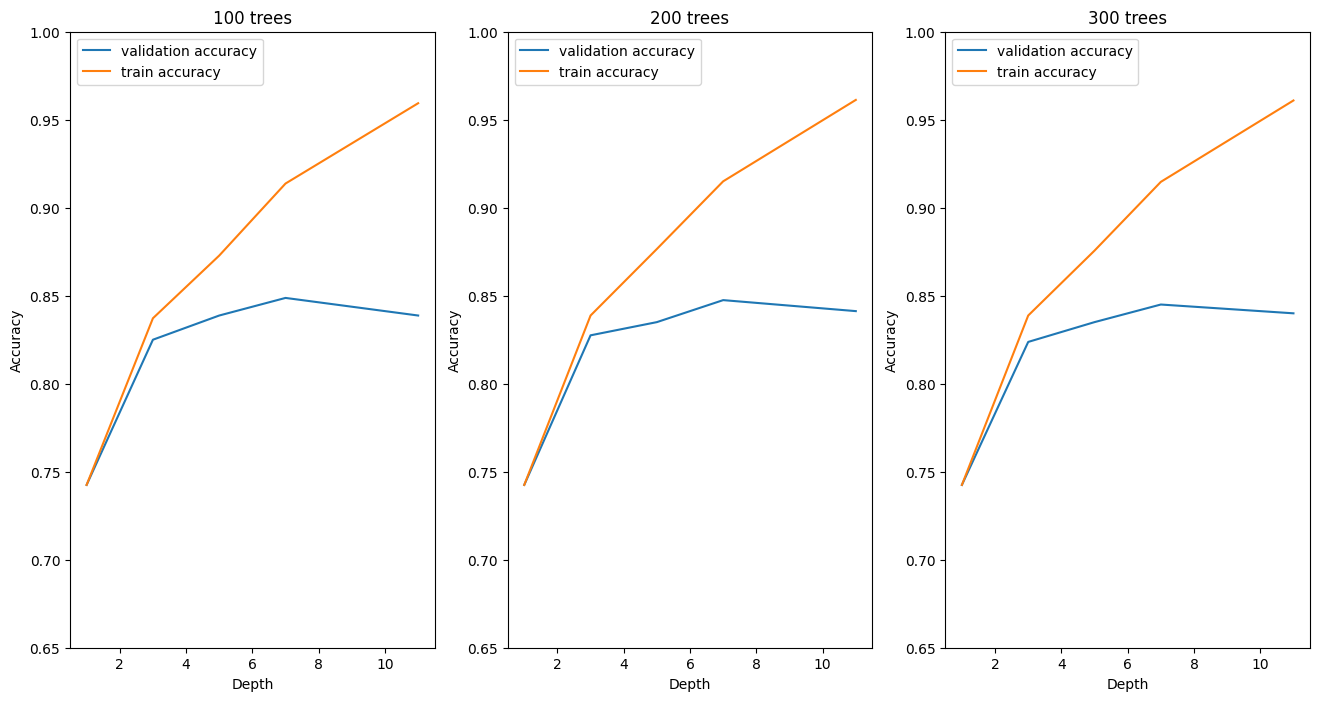

In [64]:
cvresults_61 = pd.DataFrame(m_61.cv_results_)
# cvresults_61.to_excel("output61.xlsx")

## plot training vs validation accuracy scores
plt.figure(figsize=(16,8))
# subplot 1/3
plt.subplot(131)
trees_100 = cvresults_61[cvresults_61['param_n_estimators']==100]
trees_100

plt.plot(trees_100["param_max_depth"], trees_100["mean_test_accuracy"])
plt.plot(trees_100["param_max_depth"], trees_100["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("100 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')

# subplot 2/3
plt.subplot(132)
trees_200 = cvresults_61[cvresults_61['param_n_estimators']==200]

plt.plot(trees_200["param_max_depth"], trees_200["mean_test_accuracy"])
plt.plot(trees_200["param_max_depth"], trees_200["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("200 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')


# subplot 3/3
plt.subplot(133)
trees_300 = cvresults_61[cvresults_61['param_n_estimators']==300]

plt.plot(trees_300["param_max_depth"], trees_300["mean_test_accuracy"])
plt.plot(trees_300["param_max_depth"], trees_300["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("300 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')


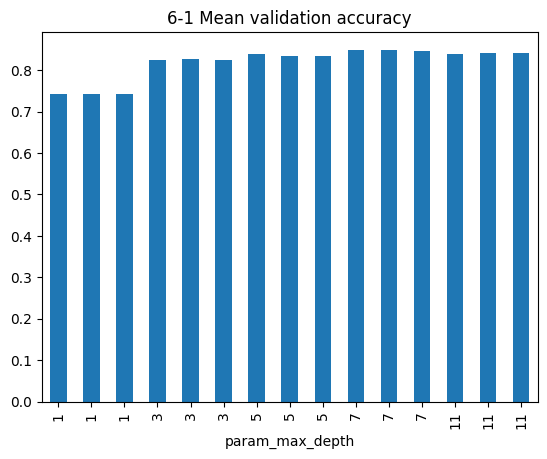

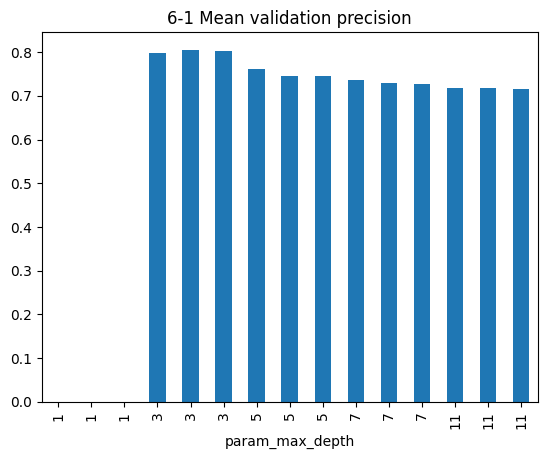

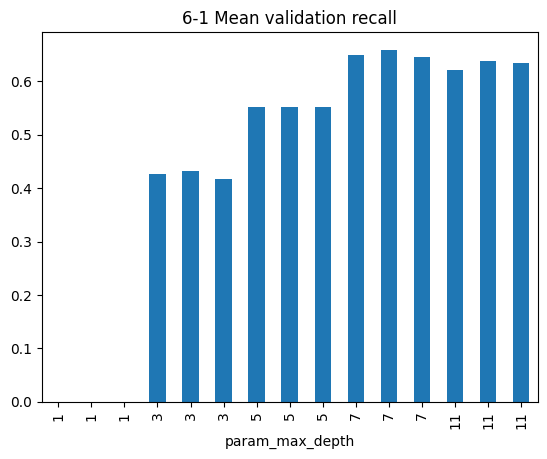

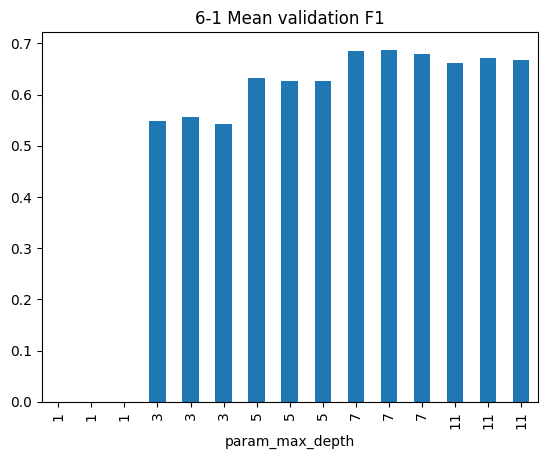

In [65]:
# show barcharts for all performance measures based on max tree depth

cvresults_61.plot(x = 'param_max_depth', y = 'mean_test_accuracy', kind = 'bar', legend = 0, title = '6-1 Mean validation accuracy')
cvresults_61.plot(x = 'param_max_depth', y = 'mean_test_precision', kind = 'bar', legend = 0, title = '6-1 Mean validation precision')
cvresults_61.plot(x = 'param_max_depth', y = 'mean_test_recall', kind = 'bar', legend = 0, title = '6-1 Mean validation recall')
cvresults_61.plot(x = 'param_max_depth', y = 'mean_test_f1', kind = 'bar', legend = 0, title = '6-1 Mean validation F1')
plt.show()

In [66]:
# show all performance measures and confusion matrix for best model version
pre_61 = m_61.predict(x_test_61)
t_ac_61 = metrics.accuracy_score(y_test_61, pre_61)
t_prec_61 = metrics.precision_score(y_test_61, pre_61)
t_recal_61 = metrics.recall_score(y_test_61, pre_61)
t_f1_61 = metrics.f1_score(y_test_61, pre_61)

print(t_ac_61)
print(t_prec_61)
print(t_recal_61)
print(t_f1_61)
print(metrics.confusion_matrix(y_test_61, pre_61))

0.865
0.7777777777777778
0.6730769230769231
0.7216494845360825
[[138  10]
 [ 17  35]]


# Model 5-1

In [67]:
m_51 = model_cv.fit(x_train_51, y_train_51)
print(m_51.best_params_)

{'max_depth': 7, 'n_estimators': 200}


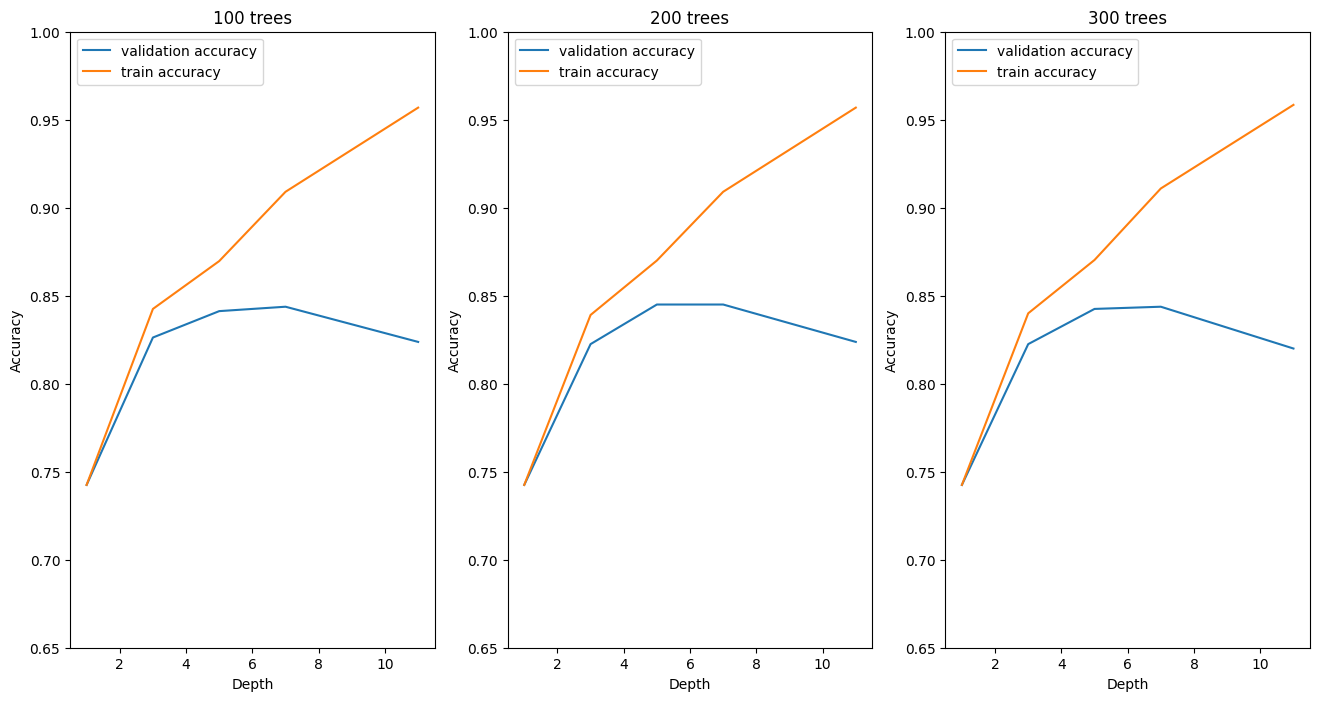

In [68]:
cvresults_51 = pd.DataFrame(m_51.cv_results_)
# cvresults_51.to_excel("output51.xlsx")

## plot training vs validation accuracy scores
plt.figure(figsize=(16,8))
# subplot 1/3
plt.subplot(131)
trees_100 = cvresults_51[cvresults_51['param_n_estimators']==100]
trees_100

plt.plot(trees_100["param_max_depth"], trees_100["mean_test_accuracy"])
plt.plot(trees_100["param_max_depth"], trees_100["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("100 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')

# subplot 2/3
plt.subplot(132)
trees_200 = cvresults_51[cvresults_51['param_n_estimators']==200]

plt.plot(trees_200["param_max_depth"], trees_200["mean_test_accuracy"])
plt.plot(trees_200["param_max_depth"], trees_200["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("200 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')


# subplot 3/3
plt.subplot(133)
trees_300 = cvresults_51[cvresults_51['param_n_estimators']==300]

plt.plot(trees_300["param_max_depth"], trees_300["mean_test_accuracy"])
plt.plot(trees_300["param_max_depth"], trees_300["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("300 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')


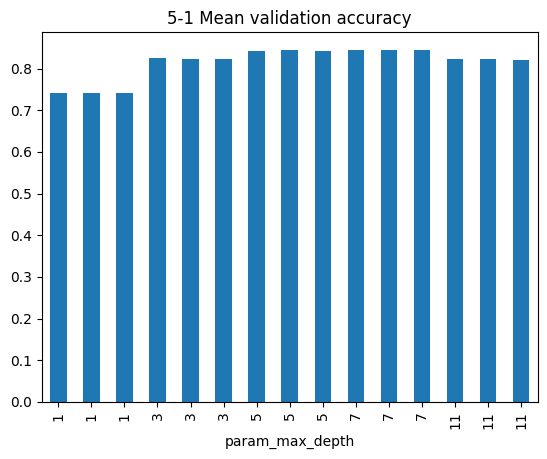

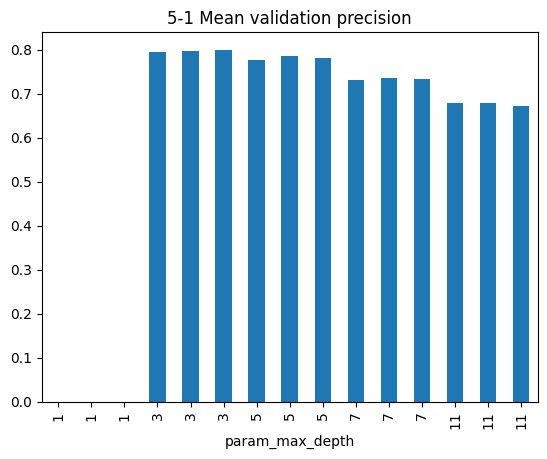

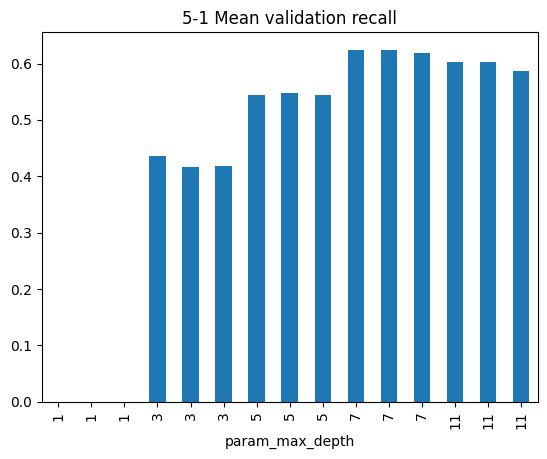

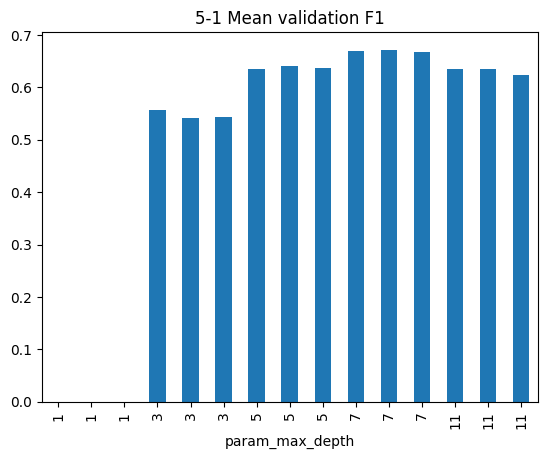

In [69]:
# show barcharts for all performance measures based on max tree depth

cvresults_51.plot(x = 'param_max_depth', y = 'mean_test_accuracy', kind = 'bar', legend = 0, title = '5-1 Mean validation accuracy')
cvresults_51.plot(x = 'param_max_depth', y = 'mean_test_precision', kind = 'bar', legend = 0, title = '5-1 Mean validation precision')
cvresults_51.plot(x = 'param_max_depth', y = 'mean_test_recall', kind = 'bar', legend = 0, title = '5-1 Mean validation recall')
cvresults_51.plot(x = 'param_max_depth', y = 'mean_test_f1', kind = 'bar', legend = 0, title = '5-1 Mean validation F1')
plt.show()

In [70]:
# show all performance measures and confusion matrix for best model version

pre_51 = m_51.predict(x_test_51)
t_ac_51 = metrics.accuracy_score(y_test_51, pre_51)
t_prec_51 = metrics.precision_score(y_test_51, pre_51)
t_recal_51 = metrics.recall_score(y_test_51, pre_51)
t_f1_51 = metrics.f1_score(y_test_51, pre_51)
print(t_ac_51)
print(t_prec_51)
print(t_recal_51)
print(t_f1_51)
print(metrics.confusion_matrix(y_test_51, pre_51))

0.87
0.782608695652174
0.6923076923076923
0.7346938775510203
[[138  10]
 [ 16  36]]


# Model 4-1

In [71]:
# fit 3 feature model
m_41 = model_cv.fit(x_train_41, y_train_41)
print(m_41.best_params_)

{'max_depth': 7, 'n_estimators': 100}


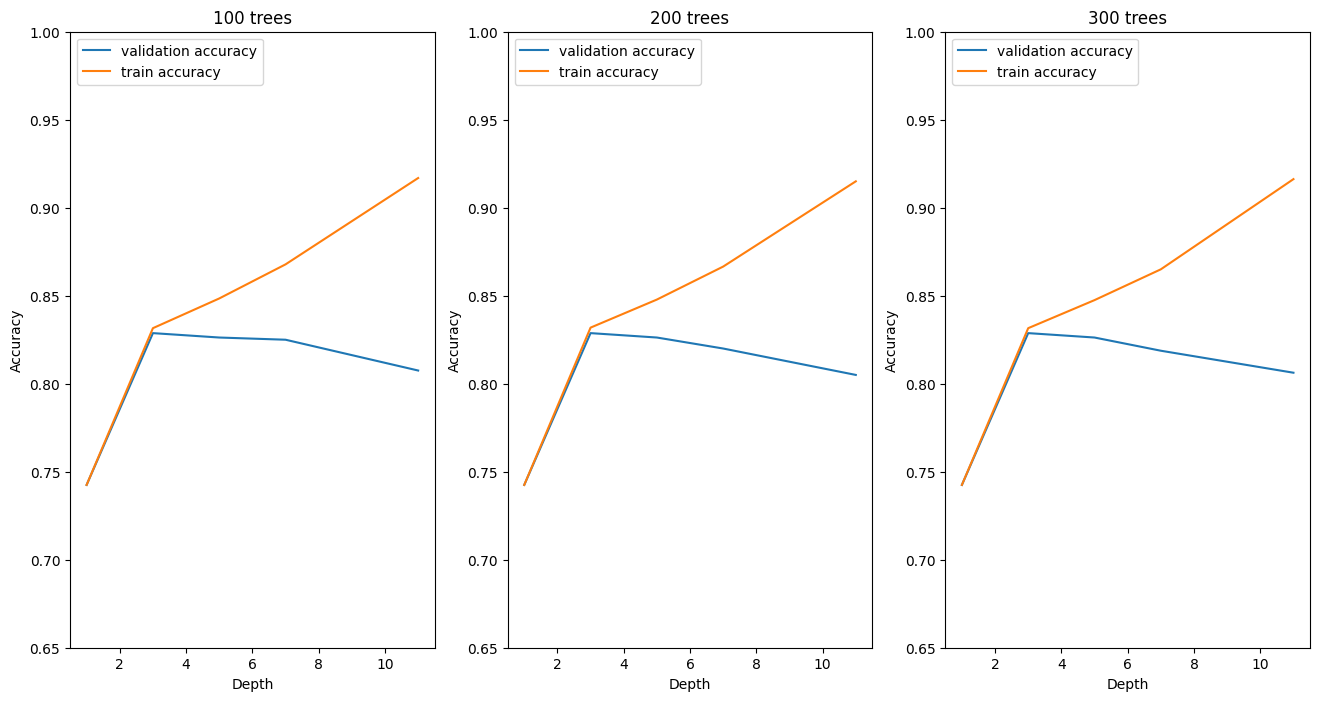

In [72]:
cvresults_41 = pd.DataFrame(m_41.cv_results_)
# cvresults_41.to_excel("output41.xlsx")

## plot training vs validation accuracy scores
plt.figure(figsize=(16,8))
# subplot 1/3
plt.subplot(131)
trees_100 = cvresults_41[cvresults_41['param_n_estimators']==100]
trees_100

plt.plot(trees_100["param_max_depth"], trees_100["mean_test_accuracy"])
plt.plot(trees_100["param_max_depth"], trees_100["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("100 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')

# subplot 2/3
plt.subplot(132)
trees_200 = cvresults_41[cvresults_41['param_n_estimators']==200]

plt.plot(trees_200["param_max_depth"], trees_200["mean_test_accuracy"])
plt.plot(trees_200["param_max_depth"], trees_200["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("200 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')


# subplot 3/3
plt.subplot(133)
trees_300 = cvresults_41[cvresults_41['param_n_estimators']==300]

plt.plot(trees_300["param_max_depth"], trees_300["mean_test_accuracy"])
plt.plot(trees_300["param_max_depth"], trees_300["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("300 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')


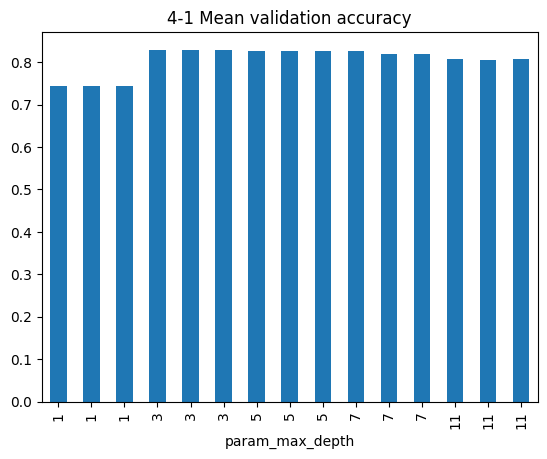

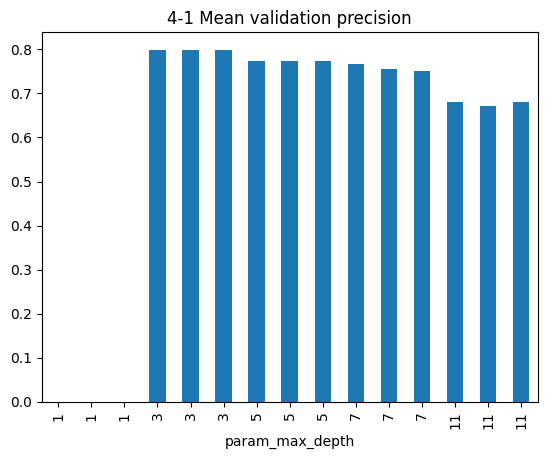

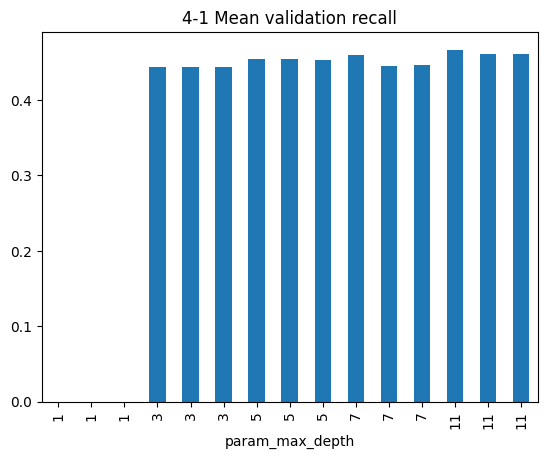

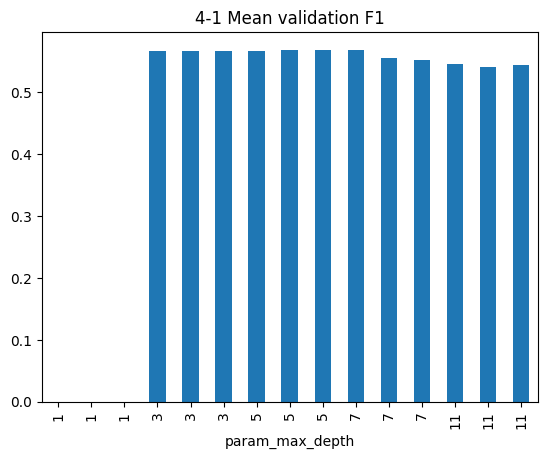

In [73]:
# show barcharts for all performance measures based on max tree depth

cvresults_41.plot(x = 'param_max_depth', y = 'mean_test_accuracy', kind = 'bar', legend = 0, title = '4-1 Mean validation accuracy')
cvresults_41.plot(x = 'param_max_depth', y = 'mean_test_precision', kind = 'bar', legend = 0, title = '4-1 Mean validation precision')
cvresults_41.plot(x = 'param_max_depth', y = 'mean_test_recall', kind = 'bar', legend = 0, title = '4-1 Mean validation recall')
cvresults_41.plot(x = 'param_max_depth', y = 'mean_test_f1', kind = 'bar', legend = 0, title = '4-1 Mean validation F1')
plt.show()

In [74]:
# show all performance measures and confusion matrix for best model version

pre_41 = m_41.predict(x_test_41)
t_ac_41 = metrics.accuracy_score(y_test_41, pre_41)
t_prec_41 = metrics.precision_score(y_test_41, pre_41)
t_recal_41 = metrics.recall_score(y_test_41, pre_41)
t_f1_41 = metrics.f1_score(y_test_41, pre_41)
print(t_ac_41)
print(t_prec_41)
print(t_recal_41)
print(t_f1_41)
print(metrics.confusion_matrix(y_test_41, pre_41))

0.84
0.8125
0.5
0.6190476190476191
[[142   6]
 [ 26  26]]


# Model 7-2

In [75]:
m_72 = model_cv.fit(x_train_72, y_train_72)
print(m_72.best_params_)

{'max_depth': 7, 'n_estimators': 200}


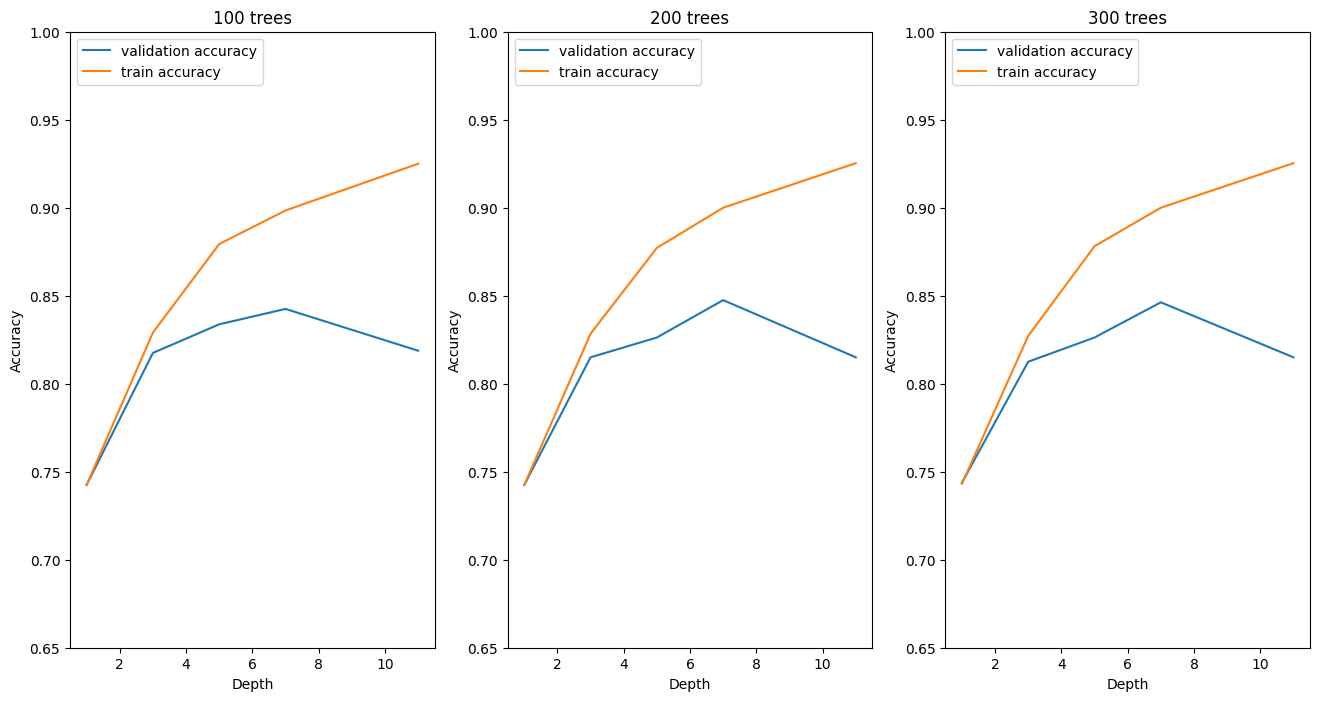

In [76]:
cvresults_72 = pd.DataFrame(m_72.cv_results_)
# cvresults_72.to_excel("output72.xlsx")

# # plotting
plt.figure(figsize=(16,8))
## plot training vs validation accuracy scores
# subplot 1/3
plt.subplot(131)
trees_100 = cvresults_72[cvresults_72['param_n_estimators']==100]
trees_100

plt.plot(trees_100["param_max_depth"], trees_100["mean_test_accuracy"])
plt.plot(trees_100["param_max_depth"], trees_100["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("100 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')

# subplot 2/3
plt.subplot(132)
trees_200 = cvresults_72[cvresults_72['param_n_estimators']==200]

plt.plot(trees_200["param_max_depth"], trees_200["mean_test_accuracy"])
plt.plot(trees_200["param_max_depth"], trees_200["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("200 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')


# subplot 3/3
plt.subplot(133)
trees_300 = cvresults_72[cvresults_72['param_n_estimators']==300]

plt.plot(trees_300["param_max_depth"], trees_300["mean_test_accuracy"])
plt.plot(trees_300["param_max_depth"], trees_300["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("300 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')


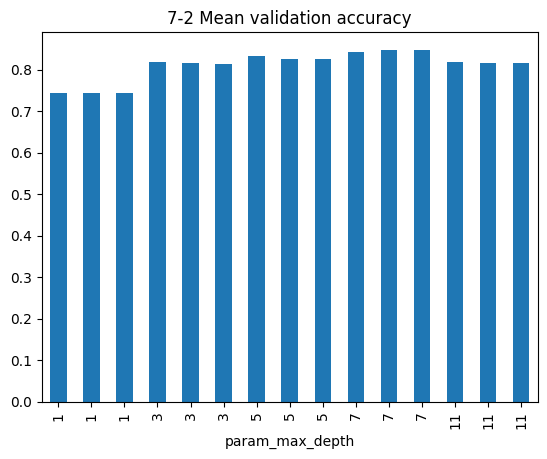

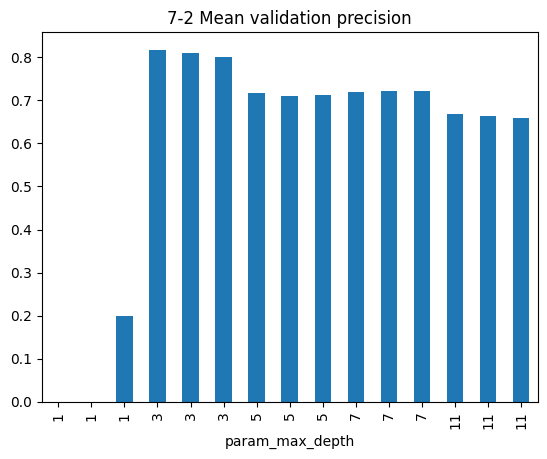

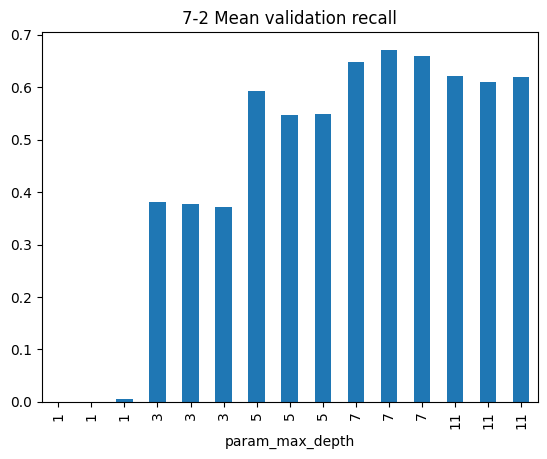

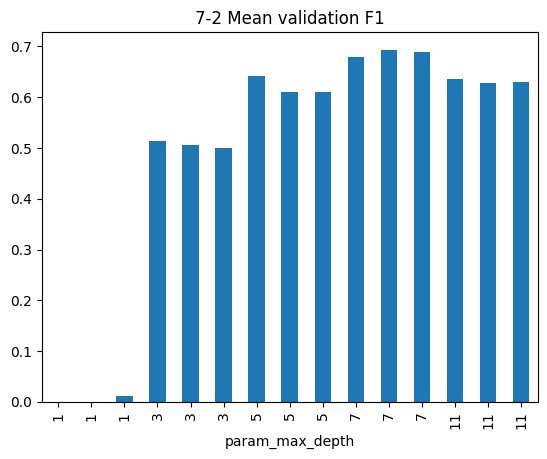

In [77]:
# show barcharts for all performance measures based on max tree depth

cvresults_72.plot(x = 'param_max_depth', y = 'mean_test_accuracy', kind = 'bar', legend = 0, title = '7-2 Mean validation accuracy')
cvresults_72.plot(x = 'param_max_depth', y = 'mean_test_precision', kind = 'bar', legend = 0, title = '7-2 Mean validation precision')
cvresults_72.plot(x = 'param_max_depth', y = 'mean_test_recall', kind = 'bar', legend = 0, title = '7-2 Mean validation recall')
cvresults_72.plot(x = 'param_max_depth', y = 'mean_test_f1', kind = 'bar', legend = 0, title = '7-2 Mean validation F1')
plt.show()

In [78]:
# show all performance measures and confusion matrix for best model version

pre_72 = m_72.predict(x_test_72)
t_ac_72 = metrics.accuracy_score(y_test_72, pre_72)
t_prec_72 = metrics.precision_score(y_test_72, pre_72)
t_recal_72 = metrics.recall_score(y_test_72, pre_72)
t_f1_72 = metrics.f1_score(y_test_72, pre_72)
print(t_ac_72)
print(t_prec_72)
print(t_recal_72)
print(t_f1_72)
print(metrics.confusion_matrix(y_test_72, pre_72))

0.87
0.76
0.7307692307692307
0.7450980392156863
[[136  12]
 [ 14  38]]


# Model 6-2

In [79]:
# fit 5 feature model
m_62 = model_cv.fit(x_train_62, y_train_62)
print(m_62.best_params_)

{'max_depth': 7, 'n_estimators': 200}


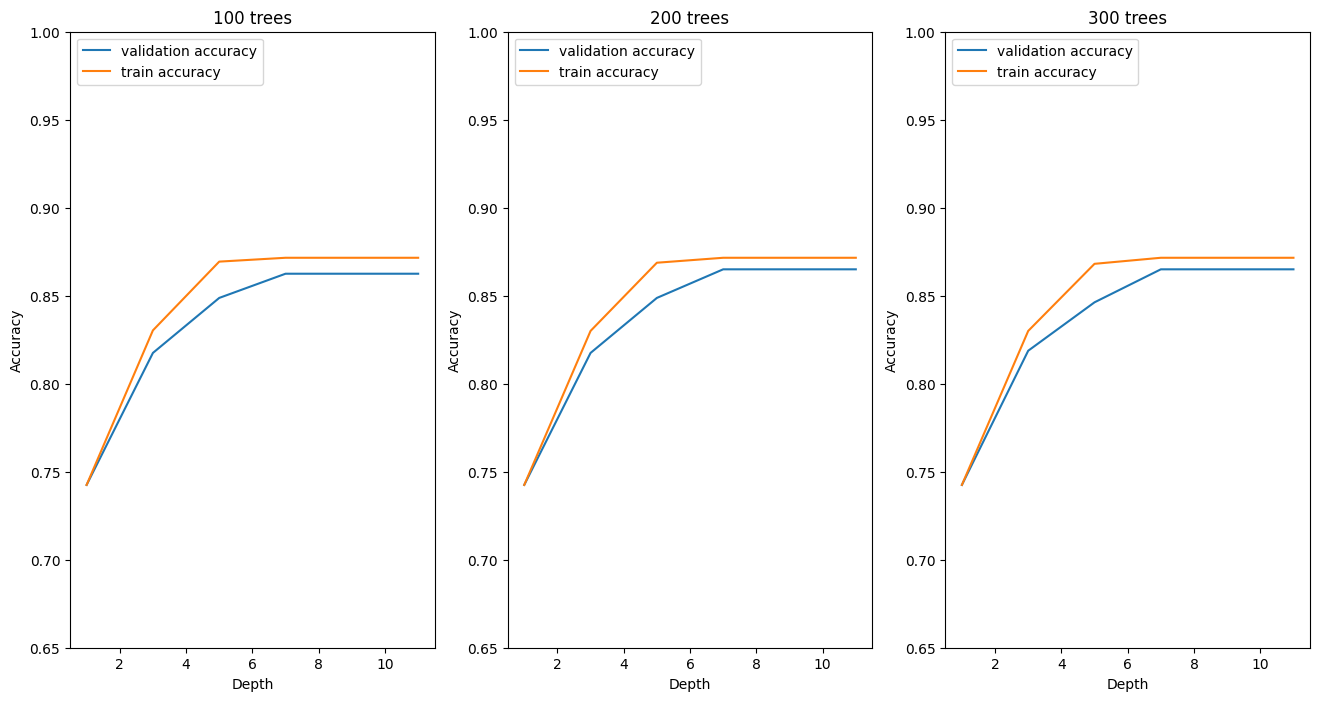

In [80]:
cvresults_62 = pd.DataFrame(m_62.cv_results_)
# cvresults_62.to_excel("output62.xlsx")

## plot training vs validation accuracy scores
plt.figure(figsize=(16,8))
# subplot 1/3
plt.subplot(131)
trees_100 = cvresults_62[cvresults_62['param_n_estimators']==100]
trees_100

plt.plot(trees_100["param_max_depth"], trees_100["mean_test_accuracy"])
plt.plot(trees_100["param_max_depth"], trees_100["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("100 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')

# subplot 2/3
plt.subplot(132)
trees_200 = cvresults_62[cvresults_62['param_n_estimators']==200]

plt.plot(trees_200["param_max_depth"], trees_200["mean_test_accuracy"])
plt.plot(trees_200["param_max_depth"], trees_200["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("200 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')


# subplot 3/3
plt.subplot(133)
trees_300 = cvresults_62[cvresults_62['param_n_estimators']==300]

plt.plot(trees_300["param_max_depth"], trees_300["mean_test_accuracy"])
plt.plot(trees_300["param_max_depth"], trees_300["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("300 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')


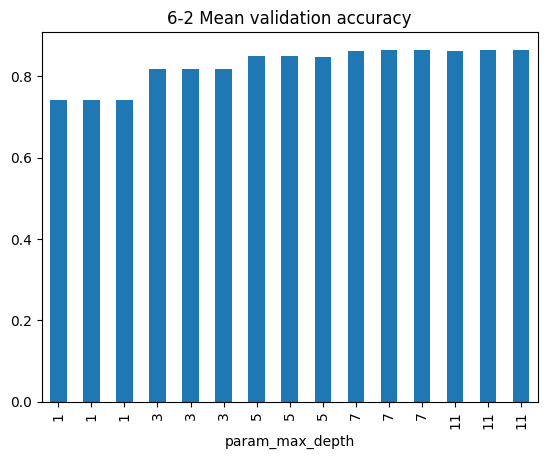

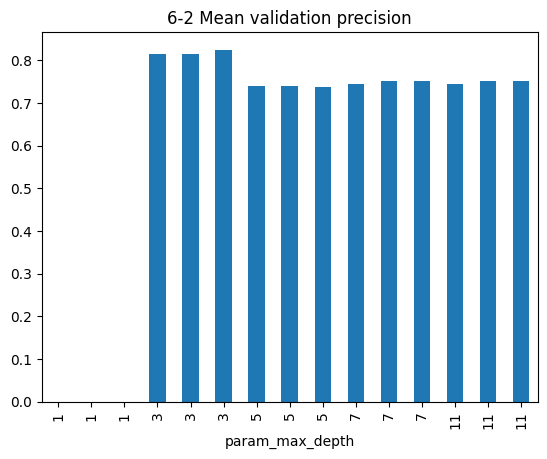

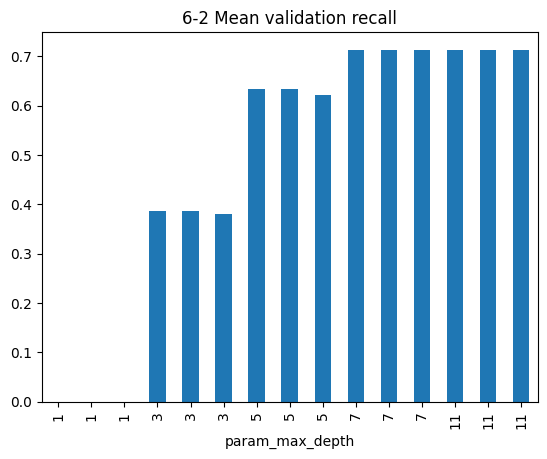

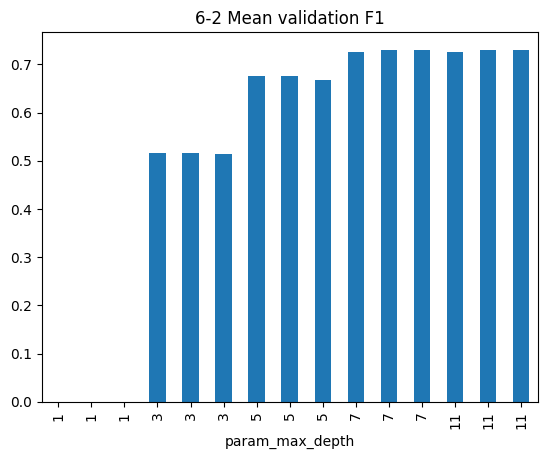

In [81]:
# show barcharts for all performance measures based on max tree depth

cvresults_62.plot(x = 'param_max_depth', y = 'mean_test_accuracy', kind = 'bar', legend = 0, title = '6-2 Mean validation accuracy')
cvresults_62.plot(x = 'param_max_depth', y = 'mean_test_precision', kind = 'bar', legend = 0, title = '6-2 Mean validation precision')
cvresults_62.plot(x = 'param_max_depth', y = 'mean_test_recall', kind = 'bar', legend = 0, title = '6-2 Mean validation recall')
cvresults_62.plot(x = 'param_max_depth', y = 'mean_test_f1', kind = 'bar', legend = 0, title = '6-2 Mean validation F1')
plt.show()

In [82]:
# show all performance measures and confusion matrix for best model version
pre_62 = m_62.predict(x_test_62)
t_ac_62 = metrics.accuracy_score(y_test_62, pre_62)
t_prec_62 = metrics.precision_score(y_test_62, pre_62)
t_recal_62 = metrics.recall_score(y_test_62, pre_62)
t_f1_62 = metrics.f1_score(y_test_62, pre_62)

print(t_ac_62)
print(t_prec_62)
print(t_recal_62)
print(t_f1_62)
print(metrics.confusion_matrix(y_test_62, pre_62))

0.865
0.7551020408163265
0.7115384615384616
0.7326732673267328
[[136  12]
 [ 15  37]]


# Model 5-2

In [83]:
m_52 = model_cv.fit(x_train_52, y_train_52)
print(m_52.best_params_)

{'max_depth': 5, 'n_estimators': 200}


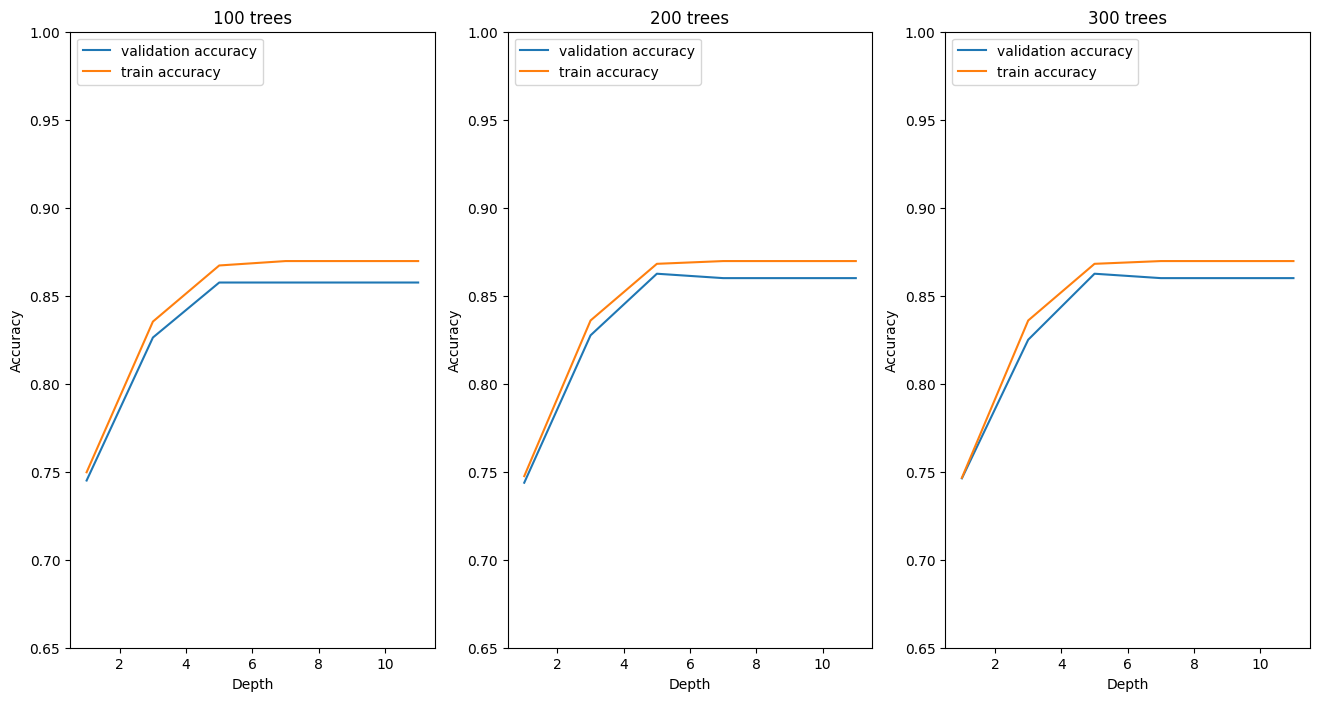

In [84]:
cvresults_52 = pd.DataFrame(m_52.cv_results_)
# cvresults_52.to_excel("output52.xlsx")

## plot training vs validation accuracy scores
# plotting
plt.figure(figsize=(16,8))
# subplot 1/3
plt.subplot(131)
trees_100 = cvresults_52[cvresults_52['param_n_estimators']==100]

plt.plot(trees_100["param_max_depth"], trees_100["mean_test_accuracy"])
plt.plot(trees_100["param_max_depth"], trees_100["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("100 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')

# subplot 2/3
plt.subplot(132)
trees_200 = cvresults_52[cvresults_52['param_n_estimators']==200]

plt.plot(trees_200["param_max_depth"], trees_200["mean_test_accuracy"])
plt.plot(trees_200["param_max_depth"], trees_200["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("200 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')


# subplot 3/3
plt.subplot(133)
trees_300 = cvresults_52[cvresults_52['param_n_estimators']==300]

plt.plot(trees_300["param_max_depth"], trees_300["mean_test_accuracy"])
plt.plot(trees_300["param_max_depth"], trees_300["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("300 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')

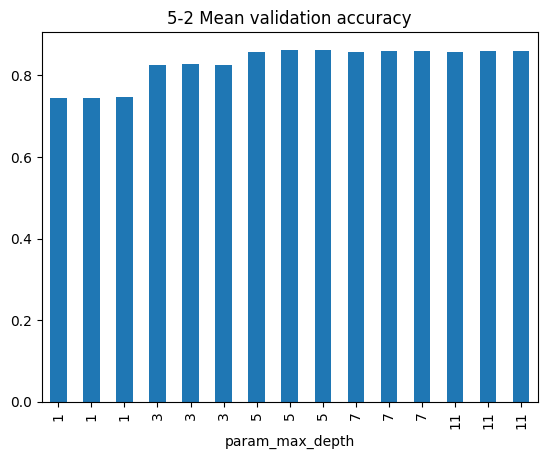

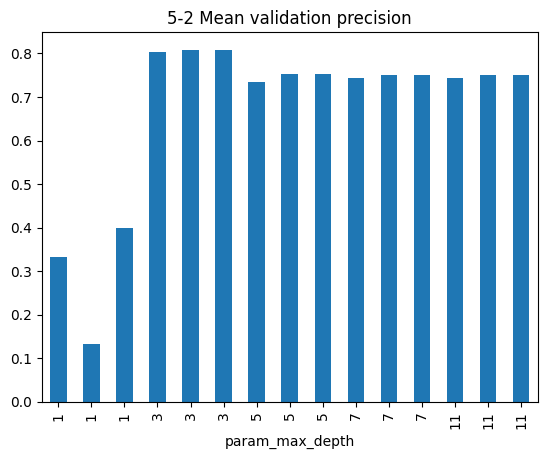

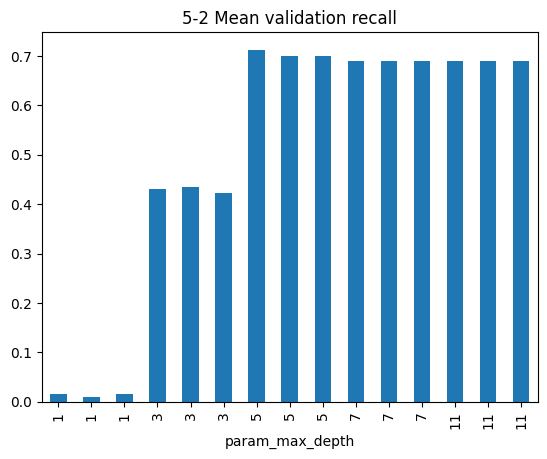

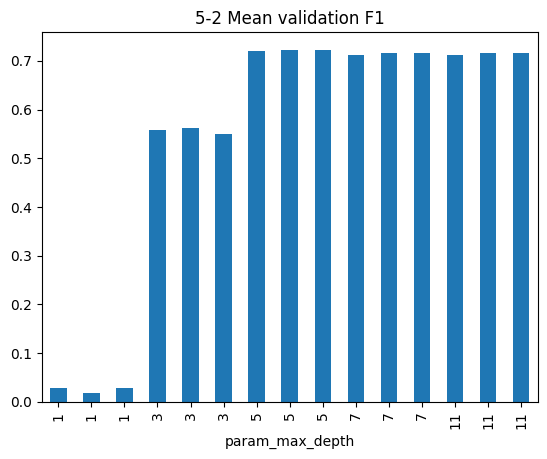

In [85]:
# show barcharts for all performance measures based on max tree depth

cvresults_52.plot(x = 'param_max_depth', y = 'mean_test_accuracy', kind = 'bar', legend = 0, title = '5-2 Mean validation accuracy')
cvresults_52.plot(x = 'param_max_depth', y = 'mean_test_precision', kind = 'bar', legend = 0, title = '5-2 Mean validation precision')
cvresults_52.plot(x = 'param_max_depth', y = 'mean_test_recall', kind = 'bar', legend = 0, title = '5-2 Mean validation recall')
cvresults_52.plot(x = 'param_max_depth', y = 'mean_test_f1', kind = 'bar', legend = 0, title = '5-2 Mean validation F1')
plt.show()

In [86]:
# show all performance measures and confusion matrix for best model version
pre_52 = m_52.predict(x_test_52)
t_ac_52 = metrics.accuracy_score(y_test_52, pre_52)
t_prec_52 = metrics.precision_score(y_test_52, pre_52)
t_recal_52 = metrics.recall_score(y_test_52, pre_52)
t_f1_52 = metrics.f1_score(y_test_52, pre_52)

print(t_ac_52)
print(t_prec_52)
print(t_recal_52)
print(t_f1_52)
print(metrics.confusion_matrix(y_test_52, pre_52))

0.865
0.7551020408163265
0.7115384615384616
0.7326732673267328
[[136  12]
 [ 15  37]]


# Model 4-2

In [87]:
m_42 = model_cv.fit(x_train_42, y_train_42)
print(m_42.best_params_)

{'max_depth': 3, 'n_estimators': 200}


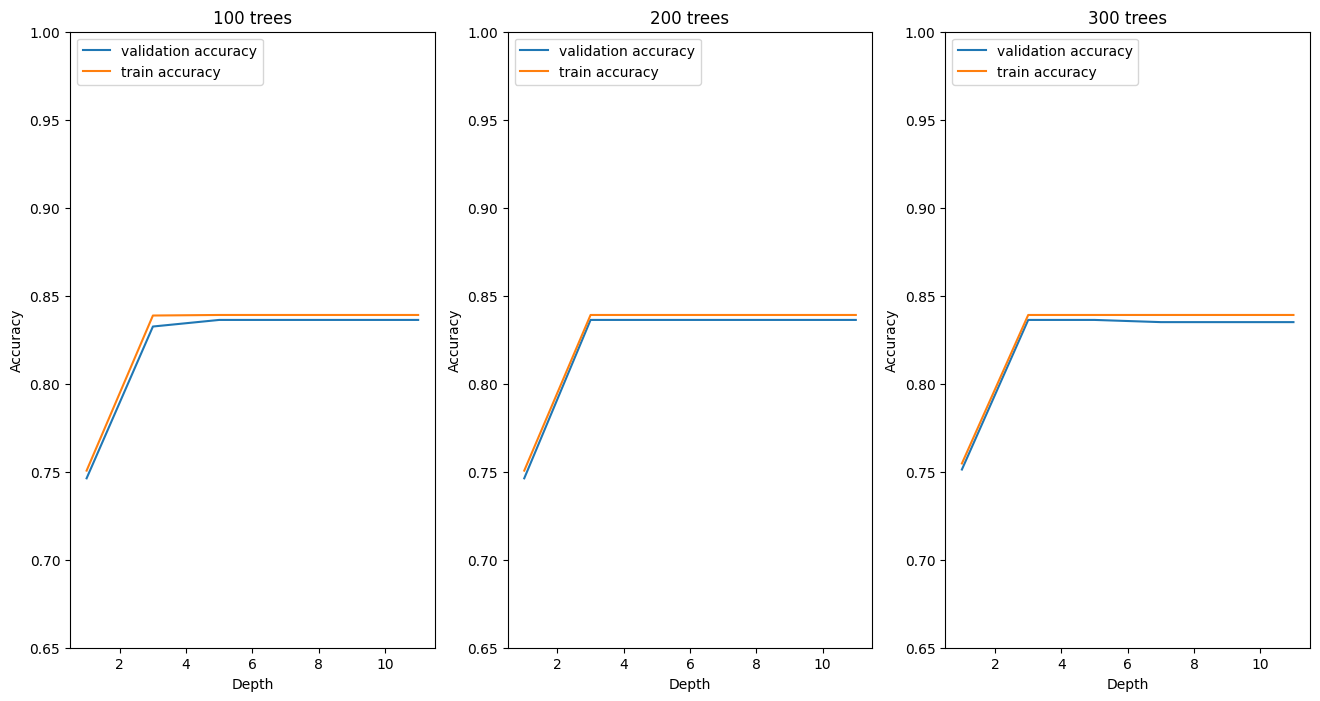

In [88]:
cvresults_42 = pd.DataFrame(m_42.cv_results_)
# cvresults_42.to_excel("output42.xlsx")

## plot training vs validation accuracy scores
plt.figure(figsize=(16,8))
# subplot 1/3
plt.subplot(131)
trees_100 = cvresults_42[cvresults_42['param_n_estimators']==100]
trees_100

plt.plot(trees_100["param_max_depth"], trees_100["mean_test_accuracy"])
plt.plot(trees_100["param_max_depth"], trees_100["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("100 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')

# subplot 2/3
plt.subplot(132)
trees_200 = cvresults_42[cvresults_42['param_n_estimators']==200]

plt.plot(trees_200["param_max_depth"], trees_200["mean_test_accuracy"])
plt.plot(trees_200["param_max_depth"], trees_200["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("200 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')


# subplot 3/3
plt.subplot(133)
trees_300 = cvresults_42[cvresults_42['param_n_estimators']==300]

plt.plot(trees_300["param_max_depth"], trees_300["mean_test_accuracy"])
plt.plot(trees_300["param_max_depth"], trees_300["mean_train_accuracy"])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title("300 trees")
plt.ylim([0.65, 1])
plt.legend(['validation accuracy', 'train accuracy'], loc='upper left')


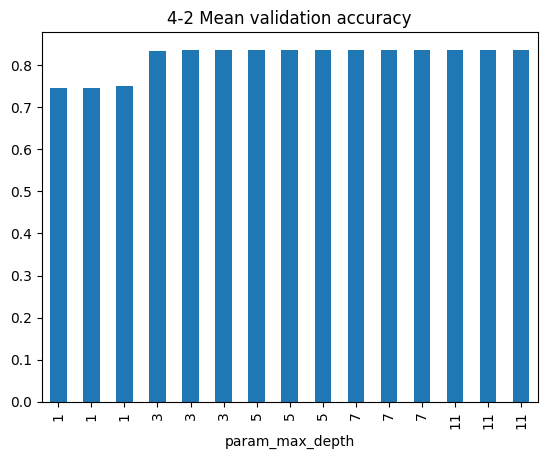

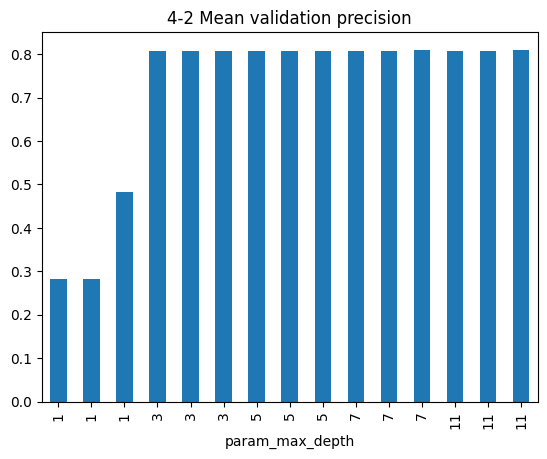

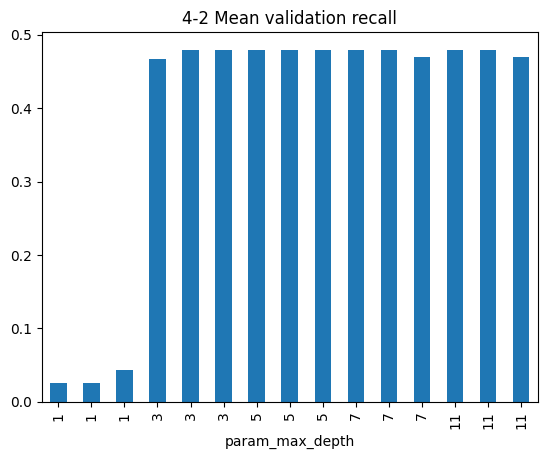

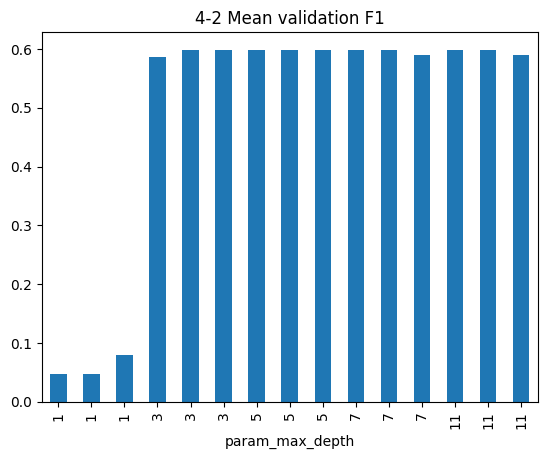

In [89]:
# show barcharts for all performance measures based on max tree depth

cvresults_42.plot(x = 'param_max_depth', y = 'mean_test_accuracy', kind = 'bar', legend = 0, title = '4-2 Mean validation accuracy')
cvresults_42.plot(x = 'param_max_depth', y = 'mean_test_precision', kind = 'bar', legend = 0, title = '4-2 Mean validation precision')
cvresults_42.plot(x = 'param_max_depth', y = 'mean_test_recall', kind = 'bar', legend = 0, title = '4-2 Mean validation recall')
cvresults_42.plot(x = 'param_max_depth', y = 'mean_test_f1', kind = 'bar', legend = 0, title = '4-2 Mean validation F1')
plt.show()

In [90]:
# show all performance measures and confusion matrix for best model version
pre_42 = m_42.predict(x_test_42)
t_ac_42 = metrics.accuracy_score(y_test_42, pre_42)
t_prec_42 = metrics.precision_score(y_test_42, pre_42)
t_recal_42 = metrics.recall_score(y_test_42, pre_42)
t_f1_42 = metrics.f1_score(y_test_42, pre_42)

print(t_ac_42)
print(t_prec_42)
print(t_recal_42)
print(t_f1_42)
print(metrics.confusion_matrix(y_test_42, pre_42))

0.845
0.8
0.5384615384615384
0.6436781609195402
[[141   7]
 [ 24  28]]


# Comparing all models

In [91]:
# compare and show performance measures for all models
numbering = [71,61,51,41,72,62,52,42]

performance = pd.DataFrame(data=numbering, columns = ["model_number"])
performance["accuracy"] = [t_ac_71,t_ac_61,t_ac_51,t_ac_41, t_ac_72, t_ac_62,t_ac_52, t_ac_42]
performance["precision"] = [t_prec_71,t_prec_61,t_prec_51,t_prec_41, t_prec_72, t_prec_62,t_prec_52, t_prec_42]
performance["recall"] = [t_recal_71,t_recal_61,t_recal_51,t_recal_41, t_recal_72, t_recal_62,t_recal_52, t_recal_42]
performance["f1"] = [t_f1_71,t_f1_61,t_f1_51,t_f1_41, t_f1_72, t_f1_62,t_f1_52, t_f1_42]

performance

,model_number,accuracy,precision,recall,f1
0,71,0.865,0.755102,0.711538,0.732673
1,61,0.865,0.777778,0.673077,0.721649
2,51,0.870,0.782609,0.692308,0.734694
3,41,0.840,0.812500,0.500000,0.619048
4,72,0.870,0.760000,0.730769,0.745098
5,62,0.865,0.755102,0.711538,0.732673
6,52,0.865,0.755102,0.711538,0.732673
7,42,0.845,0.800000,0.538462,0.643678


In [92]:
# choose model 5-1 due to reduced feature set size compared to 7-2